In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [3]:
import librosa
import librosa.display
import IPython.display as ipd

In [4]:
df = pd.read_csv("D:\\Project Working\\GTZAN\\genres\\genres_data.csv")
df.head()

,Folder_Name,File_Name,Class_ID,Class
0,blues,blues.00000.au,1,blues
1,blues,blues.00001.au,1,blues
2,blues,blues.00002.au,1,blues
3,blues,blues.00003.au,1,blues
4,blues,blues.00004.au,1,blues


In [5]:
class_name = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

In [6]:
df['Class'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: Class, dtype: int64

In [7]:
features = []
labels = []

def parser():
    # Function to load files and extract features
    for i in range(df.shape[0]):
        file_name = 'D:\\Project Working\\GTZAN\\genres\\' + str(df["Folder_Name"][i]) + '\\' + df["File_Name"][i]
        # Here kaiser_fast is a technique used for faster extraction
        data, sr = librosa.load(file_name, res_type='kaiser_fast') 
        mels = np.mean(librosa.feature.melspectrogram(y = data, sr = sr), axis=1)        
        features.append(mels)
        labels.append(df["Class_ID"][i])

    return features, labels

In [13]:
features = []
labels = []

def parser():
    # Function to load files and extract features
    for i in range(df.shape[0]):
        file_name = 'D:\\Project Working\\GTZAN\\genres\\' + str(df["Folder_Name"][i]) + '\\' + df["File_Name"][i]
        # Here kaiser_fast is a technique used for faster extraction
        data, sr = librosa.load(file_name, res_type='kaiser_fast') 
        mels = np.mean(librosa.feature.melspectrogram(y = data, sr = sr), axis=1)        
        features.append(mels)
        labels.append(df["Class_ID"][i])

    return features, labels

In [9]:
x, y = parser()

In [10]:
X = np.array(x)
Y = np.array(y)

print(X.shape)
print(Y.shape)

(1000, 128)
(1000,)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 1)

In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((750, 128), (750,), (250, 128), (250,))

In [14]:
nb = GaussianNB()

# fit classifier to training set
nb.fit(X_train, y_train)

# make predictions on test set
nb_probas = nb.predict_proba(X_test)

In [15]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 9,  0,  3,  0,  0,  9,  1,  4,  0,  0],
       [ 1, 20,  2,  0,  0,  1,  1,  0,  0,  0],
       [ 1,  5,  2,  1,  0,  9,  0,  3,  0,  0],
       [ 0,  2,  4,  8,  1,  2,  1,  3,  0,  3],
       [ 0,  0,  4,  2, 13,  5,  1,  0,  0,  0],
       [ 0, 15,  3,  0,  1, 10,  1,  0,  0,  1],
       [ 4,  0,  3,  4,  0,  3, 10,  0,  0,  1],
       [ 0,  1,  4,  4,  5,  0,  0, 10,  0,  0],
       [ 2,  3,  3,  2,  3, 10,  0,  0,  0,  0],
       [ 3,  1,  5,  1,  2,  9,  0,  3,  0,  2]], dtype=int64)

In [16]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.3360


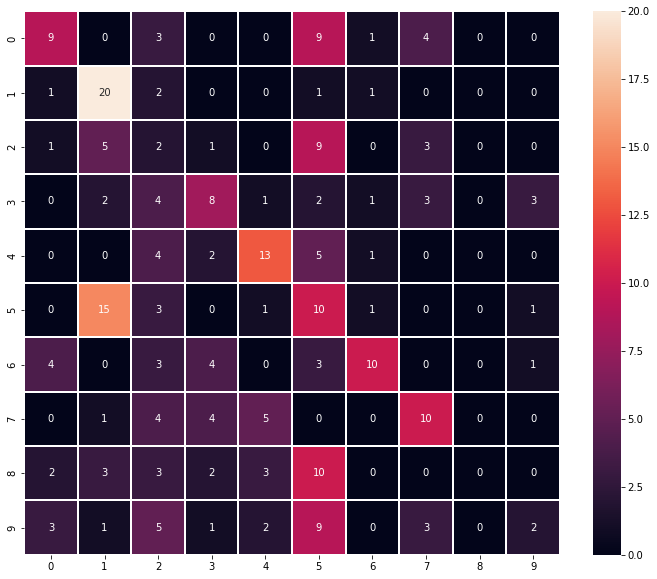

In [17]:
plt.figure(figsize = (12, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot = True, linewidths = 2, fmt="d", 
           )
plt.show()

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.45      0.35      0.39        26
           2       0.43      0.80      0.56        25
           3       0.06      0.10      0.07        21
           4       0.36      0.33      0.35        24
           5       0.52      0.52      0.52        25
           6       0.17      0.32      0.22        31
           7       0.67      0.40      0.50        25
           8       0.43      0.42      0.43        24
           9       0.00      0.00      0.00        23
          10       0.29      0.08      0.12        26

    accuracy                           0.34       250
   macro avg       0.34      0.33      0.32       250
weighted avg       0.34      0.34      0.32       250



C:\Pythondj\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Pythondj\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Pythondj\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
